<a href="https://colab.research.google.com/github/pranay-343/ML-CS6364-Final-Project/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

url = 'https://raw.githubusercontent.com/pranay-343/ML-CS6364-Final-Project/main/Dataset/USvideos.csv'
data = pd.read_csv(url)

In [2]:
data.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
data.shape

(40949, 16)

In [4]:
print(data.isnull().values.any())
data = data.dropna(how='any',axis=0)


True


In [5]:
data.describe()

,category_id,views,likes,dislikes,comment_count
count,40379.000000,4.037900e+04,4.037900e+04,4.037900e+04,4.037900e+04
mean,19.944253,2.370839e+06,7.461677e+04,3.508122e+03,8.287396e+03
std,7.594850,7.428515e+06,2.296172e+05,2.317486e+04,3.431605e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.470760e+05,5.621500e+03,2.050000e+02,6.230000e+02
50%,24.000000,6.895970e+05,1.837100e+04,6.370000e+02,1.874000e+03
75%,25.000000,1.834912e+06,5.567200e+04,1.948000e+03,5.787000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.643059e+06,1.228655e+06


In [6]:
data.drop(['video_id','thumbnail_link'],axis=1,inplace=True)

In [7]:
data.apply(lambda x: len(x.unique()))

trending_date               205
title                      6357
channel_title              2142
category_id                  16
publish_time               6172
tags                       6008
views                     39927
likes                     29664
dislikes                   8460
comment_count             13684
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


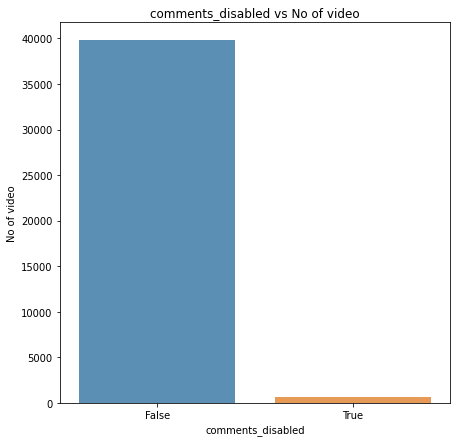

In [8]:
count=data['comments_disabled'].value_counts()
plt.figure(figsize=(7,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('{} vs No of video'.format('comments_disabled'))
plt.ylabel('No of video')
plt.xlabel('{}'.format('comments_disabled'))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


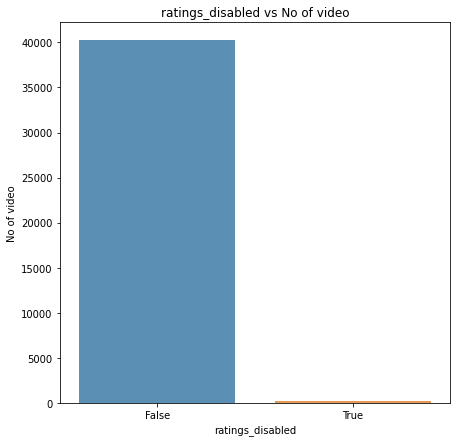

In [9]:
count=data['ratings_disabled'].value_counts()
plt.figure(figsize=(7,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('{} vs No of video'.format('ratings_disabled'))
plt.ylabel('No of video')
plt.xlabel('{}'.format('ratings_disabled'))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


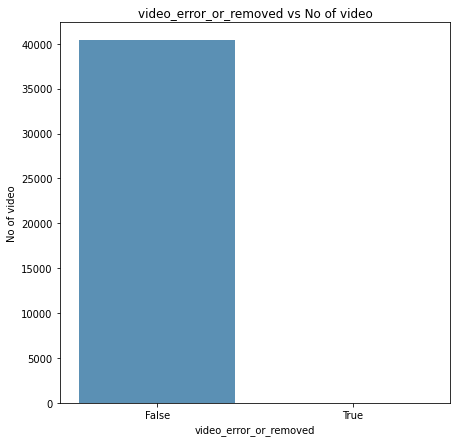

In [10]:
count=data['video_error_or_removed'].value_counts()
plt.figure(figsize=(7,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('{} vs No of video'.format('video_error_or_removed'))
plt.ylabel('No of video')
plt.xlabel('{}'.format('video_error_or_removed'))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


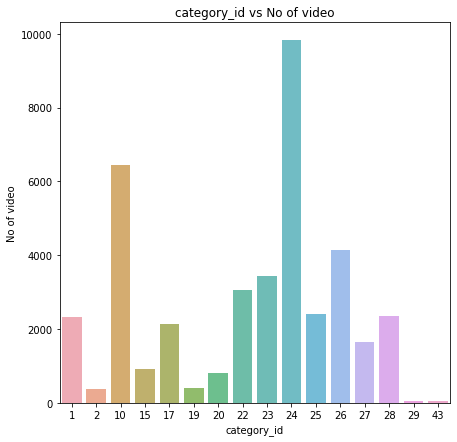

In [11]:
count=data['category_id'].value_counts()
plt.figure(figsize=(7,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('{} vs No of video'.format('category_id'))
plt.ylabel('No of video')
plt.xlabel('{}'.format('category_id'))
plt.show()

In [12]:
#No of tags
tags=[x.count("|")+1 for x in data["tags"]]
data["No_tags"]=tags

In [13]:
#length of desription
desc_len=[len(x) for x in data["description"]]
data["desc_len"]=desc_len

In [14]:
#length of title
title_len=[len(x) for x in data["title"]]
data["len_title"]=title_len

In [15]:
publish_time = pd.to_datetime(data['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
data['publish_time'] = publish_time.dt.time
data['publish_date'] = publish_time.dt.date

In [16]:
#day at which video is publish
data['publish_weekday']=publish_time.dt.day_name()

In [17]:
trending_date = pd.to_datetime(data['trending_date'],format="%y.%d.%m")

In [18]:
data['trending_days'] = (trending_date-publish_time).astype('timedelta64[D]')

In [19]:
data['hours_of_pub'] = (trending_date-publish_time).astype('timedelta64[h]')

In [20]:
from wordcloud import WordCloud, STOPWORDS

In [21]:
comment_words = '' 
stopwords = set(STOPWORDS) 

# Iterating through the .csv data file 
for i in data.title: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "

In [23]:
# Creating the Word Cloud
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

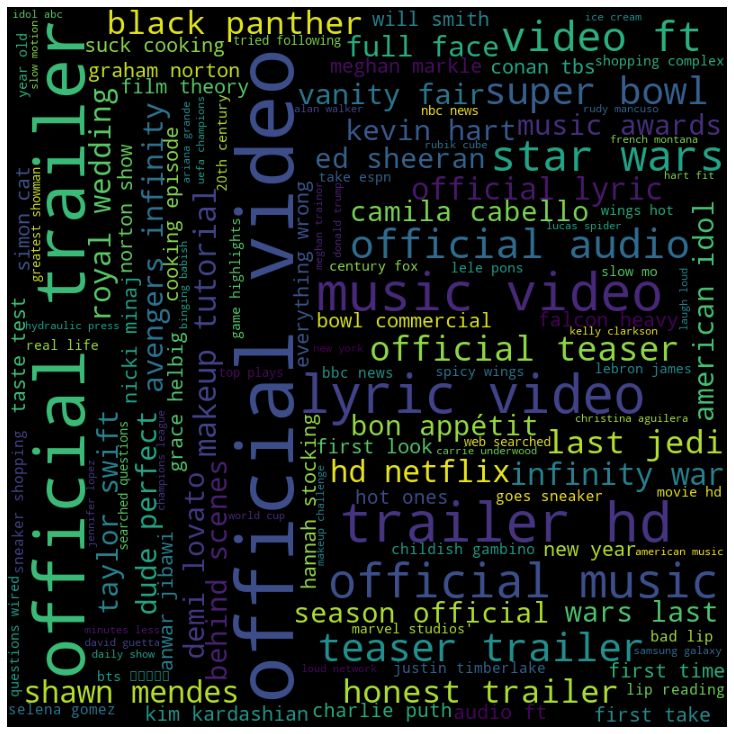

In [24]:
# Displaying the WordCloud                    
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [49]:
from sklearn import preprocessing

In [50]:
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
data['views'].reshape(-1, 1)

In [52]:
x_scaled = min_max_scaler.fit_transform(data['views'].reshape(-1, 1))

AttributeError: ignored

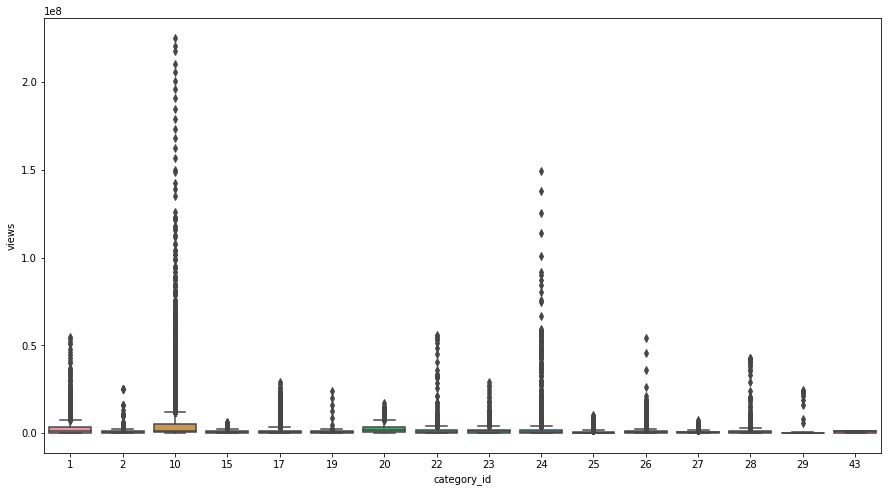

In [48]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="category_id", y="views", data=data)

In [44]:
#ratio of view/likes  upto 3 decimal
data["Ratio_View_likes"]=round(data["views"]/data["likes"],3)
#ratio of view/dislikes  upto 3 decimal
data["Ratio_View_dislikes"]=round(data["views"]/data["dislikes"],3)
#ratio of view/comment_count  upto 3 decimal
data["Ratio_views_comment_count"]=round(data["views"]/data["comment_count"],3)
#ratio of likes/dislikes  upto 3 decimal
data["Ratio_likes_dislikes"]=round(data["likes"]/data["dislikes"],3)

In [46]:
print(max(data["Ratio_View_likes"]))
print(max(data["Ratio_View_dislikes"]))
print(max(data["Ratio_views_comment_count"]))
print(max(data["Ratio_likes_dislikes"]))

inf
inf
inf
inf


In [47]:
#removing the infinite values
data=data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(how='any',axis=0)

In [48]:
data['publish_weekday'] = data['publish_weekday'].replace({'Monday':1,
                                                             'Tuesday':2,
                                                             'Wednesday':3,
                                                             'Thursday':4,
                                                             'Friday':5,
                                                             'Saturday':6,
                                                             'Sunday':7})

Thursday     6877
Friday       6845
Wednesday    6687
Tuesday      6686
Monday       6080
Sunday       3640
Saturday     3564
Name: publish_weekday, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


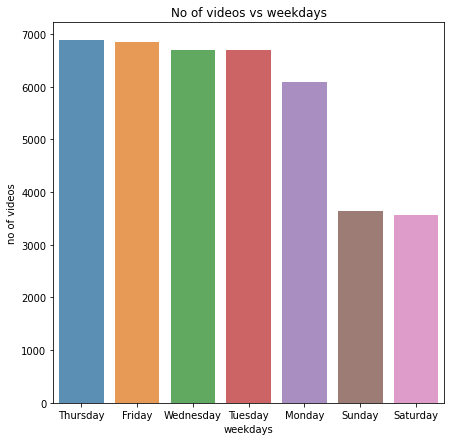

In [44]:
count=data["publish_weekday"].value_counts()
print(count)
plt.figure(figsize=(7,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('No of videos vs weekdays')
plt.ylabel('no of videos')
plt.xlabel('weekdays')
plt.show()

Text(0.5, 1.0, 'Correlation between features')

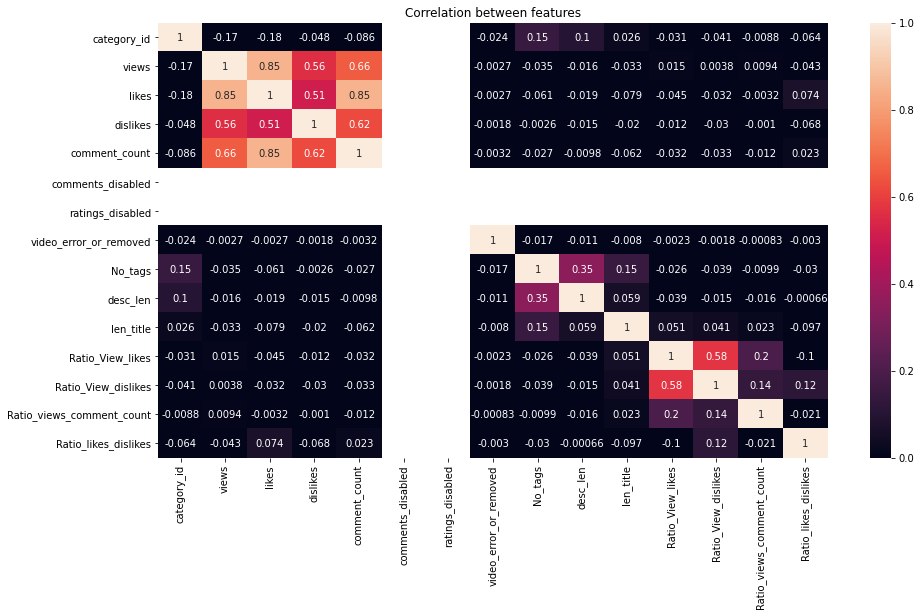

In [51]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot = True,fmt='.2g',vmin=0, vmax=1)
plt.title('Correlation between features')

In [69]:
data.head(5)

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title,publish_weekday,Ratio_View_likes,Ratio_View_dislikes,Ratio_views_comment_count,Ratio_likes_dislikes
0,22,748374,57527,2966,15954,False,False,False,1,1410,34,<bound method PandasDelegate._add_delegate_acc...,13.009,252.318,46.908,19.395
1,24,2418783,97185,6146,12703,False,False,False,4,630,62,<bound method PandasDelegate._add_delegate_acc...,24.888,393.554,190.410,15.813
2,23,3191434,146033,5339,8181,False,False,False,23,1177,53,<bound method PandasDelegate._add_delegate_acc...,21.854,597.759,390.103,27.352
3,24,343168,10172,666,2146,False,False,False,27,1403,32,<bound method PandasDelegate._add_delegate_acc...,33.737,515.267,159.911,15.273
4,24,2095731,132235,1989,17518,False,False,False,14,636,24,<bound method PandasDelegate._add_delegate_acc...,15.849,1053.661,119.633,66.483


In [52]:
data.drop(['trending_date','publish_date','publish_time','tags','title','description','channel_title'],axis=1,inplace=True)

In [53]:
views=data['views']
youtube_view=data.drop(['views'],axis=1,inplace=False)

In [55]:
from sklearn.model_selection import train_test_split

train,test,y_train,y_test=train_test_split(youtube_view,views, test_size=0.2,shuffle=False)

In [56]:
print(train.shape,test.shape,y_train.shape,y_test.shape)


(31596, 15) (7900, 15) (31596,) (7900,)


In [61]:
train.drop('publish_weekday',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [65]:
test.drop('publish_weekday',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
train.dtypes

category_id                    int64
likes                          int64
dislikes                       int64
comment_count                  int64
comments_disabled               bool
ratings_disabled                bool
video_error_or_removed          bool
No_tags                        int64
desc_len                       int64
len_title                      int64
Ratio_View_likes             float64
Ratio_View_dislikes          float64
Ratio_views_comment_count    float64
Ratio_likes_dislikes         float64
dtype: object

In [63]:
# REGRESSION ANALYSIS

# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 5886881.762529537
Variance score: 0.79
Result : 0.7929156713513966
       True Labels  Predicted Labels
32824       465151      7.519067e+05
32825      1433725      3.012018e+06
32826       204246      6.335209e+05
32827       774092      1.026833e+06
32828      4155055      1.585900e+06
...            ...               ...
40943      8259128      1.430016e+07
40944      1685609      1.435572e+06
40946      1066451      1.524178e+06
40947      5660813      5.222473e+06
40948     10306119      1.507008e+07

[7900 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


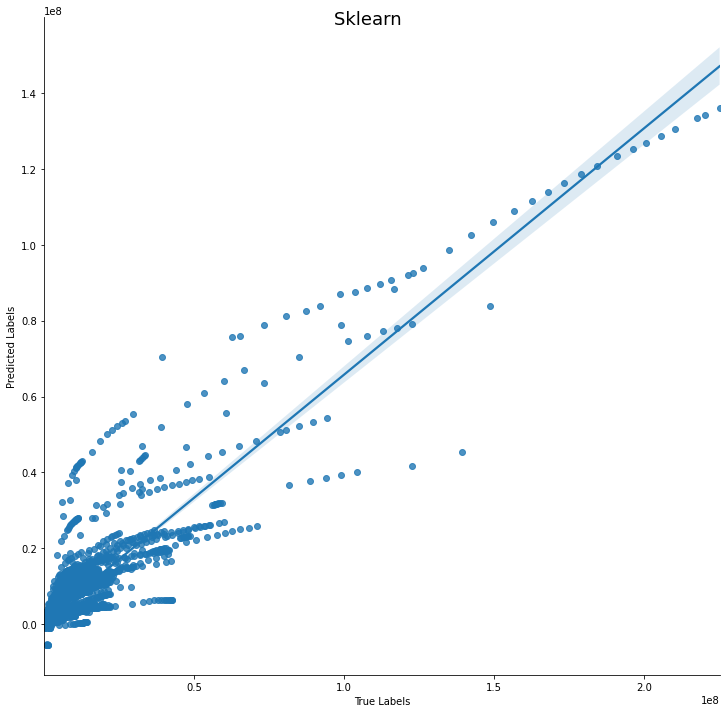

In [67]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)